# EDA con datos de multas de tráfico del Ayuntamiento de Gijón

El Ayuntamiento de Gijón mantiene un amplio catálogo de datos abiertos en su página web: https://transparencia.gijon.es/page/1808-catalogo-de-datos

Podemos descargar información en distintos formatos sobre calidad del aire, uso de servicios públicos, licitaciones, ayudas públicas, etc.

Para este pequeño ejercicio de exploración de datos he elegido los datos de multas de tráfico que actualmente tienen publicado en su web. Son 4 tablas que incluyen información de multas de tráfico del año 2015 a 2018. 

Para acceder a estos datos lo único que tenemos que hacer es entrar en el portal de trasparencia del Ayuntamiento de Gijón, poner "multas" en su buscador y descargar los archivos (en formato csv) que aparecen. https://transparencia.gijon.es/risp_datasetsb

![](imgs/portal_trasparencia_ayto_Gijon_multas.png)

## Importación de librerías

Importamos las librerías necesarias para el análisis.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


matplotlib.style.use('ggplot')
%matplotlib inline

# pip install seaborn 
import seaborn as sns


#!pip install folium

import folium

## Importación de los datos a analizar

Los archivos "658.csv", "659.csv" y "660.csv" dan error de codificación al intentar importarlos: "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 1: invalid continuation byte" Es debido a que no están formateados en "UTF-8", que es la codificación que por defecto utiliza la función read_csv.

In [8]:
df = pd.read_csv("data/original_data/660.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 1: invalid continuation byte

Si utilizáis el comando "file" en la consola de bash o en el notebook así "!file" el sistema os devolverá la siguiente información: "xxx.csv: ISO-8859 text, with very long lines, with CRLF line terminators" (esto lo podremos hacer desde máquinas con Mac OS o Linux).

In [9]:
!file "data/original_data/658.csv"

data/original_data/658.csv: ISO-8859 text, with very long lines, with CRLF line terminators


Utilizando esta información volvemos a intentar importar el archivo (no funciona con "ISO-8859"; hay que especificar que es "ISO-8859-1").

In [10]:
multas = pd.read_csv("data/original_data/658.csv", encoding="ISO-8859-1")

En vez de ejecutar tres veces la misma función listamos en un archivo los "file pahts" de los tres archivos csv a importar y creamos un bucle que itera sobre este listado, importando cada uno de estos archivos y finalmente concatenándolos en un único dataframe.

In [11]:
filesnames = ("data/original_data/658.csv", "data/original_data/659.csv","data/original_data/660.csv")

dfs = list()
for filename in filesnames:    
    df = pd.read_csv(filename, encoding="ISO-8859-1")    
    dfs.append(df)
    
multas_2015_2017 = pd.concat(dfs, axis=0, ignore_index=True)

Importamos el csv correspondiente al año 2018.

In [12]:
multas_2018 = pd.read_csv("data/original_data/661.csv")

Y lo unimos al dataset con los 3 años anteriores. Este último dataframe lo llamamos simplemente "multas".

In [13]:
multas = pd.concat([multas_2015_2017, multas_2018], axis=0)

## Exploración inicial y tratamiento de datos

Aplicando el comando info al dataframe vemos que consta de 250.171 registros y 16 columnas (variables). Vemos también que no todas las variables están al 100% completadas y que por ejemplo, tenemos el mes, el día y la hora separados 
en distintas variables. 

In [14]:
multas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250171 entries, 0 to 66958
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TIPO              250171 non-null  object 
 1   CALIFICACION      250171 non-null  object 
 2   LUGAR             250171 non-null  object 
 3   NUMERO            155614 non-null  float64
 4   AÑO               250171 non-null  int64  
 5   MES               250171 non-null  int64  
 6   DIA               250171 non-null  int64  
 7   HORA              250171 non-null  object 
 8   IMPORTE           250171 non-null  int64  
 9   DESCUENTO         250171 non-null  int64  
 10  PUNTOS            250171 non-null  int64  
 11  INFRACCION        250171 non-null  object 
 12  VELOCIDAD         124465 non-null  object 
 13  VELOCIDAD_LIMITE  124468 non-null  object 
 14  LATITUD           137880 non-null  float64
 15  LONGITUD          137880 non-null  float64
dtypes: float64(3), int64(

Echamos un vistazo a 10 registros al azar.
Y como vemos, tenemos un poco de todo. Variables categóricas, temporales, numéricas, geoposicionales, etc. Es un dataset fantástico para realizar un ejercicio de exploración de datos.

In [15]:
multas.sample(10)

,TIPO,CALIFICACION,LUGAR,NUMERO,AÑO,MES,DIA,HORA,IMPORTE,DESCUENTO,PUNTOS,INFRACCION,VELOCIDAD,VELOCIDAD_LIMITE,LATITUD,LONGITUD
19122,Tráfico,Muy Grave,CTRA AS-248 (GIJON-POLA DE SIERO) KM 10,NaN,2018,6,4,20:17,1000,0,6,CIRCULAR EL CONDUCTOR DE CUALQUIER VEHICULO CO...,NaN,NaN,NaN,NaN
40890,Velocidad,Grave,AVDA PRINCIPE DE ASTURIAS,14.0,2018,4,20,12:18,100,0,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,61 km/h (56 km/h aplicado coefic. corrector).,50 Km/h.,43.537370,-5.690662
167821,Velocidad,Grave,CTRA CARBONERA,75.0,2017,6,24,10:34,100,50,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,64 km/h (59 km/h aplicado coefic. corrector).,50 Km/h.,43.517889,-5.674423
99099,Velocidad,Grave,AVDA PRINCIPE DE ASTURIAS,14.0,2016,7,5,11:42,100,50,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,61 km/h (56 km/h aplicado coefic. corrector).,50 Km/h.,43.537370,-5.690662
107432,Velocidad,Grave,AVDA OVIEDO,9.0,2016,9,29,16:49,100,50,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,60 km/h (55 km/h aplicado coefic. corrector).,50 Km/h.,43.522704,-5.682149
81656,Velocidad,Grave,AVDA JUAN CARLOS I,NaN,2016,1,18,20:29,100,50,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,62km/h(57km/h aplicado coefic.corrector).,50 Km/h.,NaN,NaN
61637,Velocidad,Grave,"CTRA SOMIO, DE",475.0,2018,10,20,15:33,100,0,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,60 km/h (55 km/h aplicado coefic. corrector).,50 Km/h.,NaN,NaN
29801,Tráfico,Grave,CALLE RIO CARES,18.0,2018,12,21,11:30,200,0,0,ESTACIONAR EN LOS LUGARES RESERVADOS PARA CARG...,NaN,NaN,43.519733,-5.665020
29950,Tráfico,Leve,CALLE JAPON,7.0,2018,12,24,02:09,90,0,0,ESTACIONAR EN LOS CARRILES O PARTES DE LA VÍA ...,NaN,NaN,43.521892,-5.669090
6711,ORA,Leve,AVDA MANUEL LLANEZA,73.0,2018,7,17,12:14,90,0,0,ESTACIONAR EN LOS LUGARES HABILITADOS POR LA A...,NaN,NaN,43.534454,-5.667294


Además con este primer vistazo ya podríamos realizar una descripción de cada una de las variables (en la web de trasparencia no parece existir un diccionario para estas tablas).

Podemos extraer los nombres de las columnas de la siguiente forma:

In [16]:
multas.columns.tolist()

['TIPO',
 'CALIFICACION',
 'LUGAR',
 'NUMERO',
 'AÑO',
 'MES',
 'DIA',
 'HORA',
 'IMPORTE',
 'DESCUENTO',
 'PUNTOS',
 'INFRACCION',
 'VELOCIDAD',
 'VELOCIDAD_LIMITE',
 'LATITUD',
 'LONGITUD']

### Descripción de las variables  
Nota: Esta es una aproximación al significado de cada una de las variables, que para un ejercicio de este tipo nos puede servir. En un ejercicio real lo primero que tendríamos que hacer sería consultar a los propietarios de los datos el  significado (y particularidades) de cada una de ellas (aún teniendo a mano un diccionario descriptivo de estas).

__'TIPO':__ Tipo de infracción (velocidad, tráfico, ORA, etc.)  
__'CALIFICACION':__ Gravedad de la infracción.   
__'LUGAR':__ Calle o vía donde se produce la infracción.   
__'NUMERO':__ Número de la calle o vía registrada en la variable 'LUGAR'.  
__'AÑO':__ Año de la infracción.  
__'MES':__ Mes de la infracción.  
__'DIA':__ Día de la infracción.  
__'HORA':__ Hora del día de la infracción (desconocemos si es GMT o Local).  
__'IMPORTE':__ Importe de la multa.  
__'DESCUENTO':__ Parece que se refiere al descuento aplicado a los infractores que acceden a pagar la multa en el momento para reducir el importe de la misma. En los casos que no acceden a este procedimiento se registra un "0" (habría que confirmar el significado de esta variable).  
__'PUNTOS':__ En principio parece que indica los puntos a descontar al conductor multado.  
__'INFRACCION':__ Descripción de la infracción cometida.  
__'VELOCIDAD':__ Información acerca de la velocidad del vehículo. En aquellos registros que están completados aparecen dos registros de velocidad, la medida y una reducida por un coeficiente reductor.  
__'VELOCIDAD_LIMITE':__ Velocidad límite de la calle o vía.  
__'LATITUD':__ Latitud.  
__'LONGITUD:__ Longitud.  

### Transformación de las variables de tiempo

Las unidades de tiempo se presentan separadas, no existiendo ninguna variable donde se recoja completa la fecha o la fecha-hora de cada registro. Esto aunque en alguna circunstancia nos puede ayudar, no es muy conveniente en general. Así que vamos a crear una variable nueva con formato fecha-hora basada en las existentes. 

Antes cambiamos los nombres de las variables para que la función que vamos a utilizar las reconozca.

In [17]:
multas = multas.rename(columns={'AÑO':'year', 'MES':'month','DIA':'day'})

Comprobamos que efectivamente hemos cambiado correctamente los nombres de estas variables.

In [18]:
multas.columns

Index(['TIPO', 'CALIFICACION', 'LUGAR', 'NUMERO', 'year', 'month', 'day',
       'HORA', 'IMPORTE', 'DESCUENTO', 'PUNTOS', 'INFRACCION', 'VELOCIDAD',
       'VELOCIDAD_LIMITE', 'LATITUD', 'LONGITUD'],
      dtype='object')

En el caso de la variable 'HORA' tenemos que realizar una transformación adicional, dividiéndola en dos variables, 'hour' y 'minute'.

In [19]:
multas[['hour', 'minute']] = multas.HORA.str.split(pat = ":", n = 1, expand = True)

Una vez realizadas estas transformaciones ya podemos utilizar la función 'to_datetime'. Creamos una nueva variable llamada 'date_time' y eliminamos las variables 'HORA', 'day' y 'minute'.

In [20]:
multas['date_time'] = pd.to_datetime(multas[['year', 'month', 'day', 'hour', 'minute']])
multas = multas.drop(['HORA', 'day', 'minute'], axis=1)

Inspeccionamos el dataframe para ver el resultado.

In [21]:
multas.sample(5)

,TIPO,CALIFICACION,LUGAR,NUMERO,year,month,IMPORTE,DESCUENTO,PUNTOS,INFRACCION,VELOCIDAD,VELOCIDAD_LIMITE,LATITUD,LONGITUD,hour,date_time
155756,Velocidad,Grave,CTRA AS-248 (GIJON-POLA DE SIERO),NaN,2017,3,100,0,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,61km/h( 56km/h aplicado coefic.corrector,50 Km/h.,NaN,NaN,08,2017-03-31 08:21:00
151605,Velocidad,Grave,AVDA P DE ASTURIAS (EDUARDO CASTRO),NaN,2017,2,100,50,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,60km/h( 55km/h aplicado coefic.corrector,50 Km/h.,NaN,NaN,09,2017-02-09 09:26:00
157613,Velocidad,Grave,"CTRA PROVIDENCIA, DE LA",NaN,2017,4,100,50,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,61km/h(056km/h aplicado coefic.corrector,50 Km/h.,NaN,NaN,18,2017-04-09 18:43:00
179656,Velocidad,Grave,AVDA PRINCIPE DE ASTURIAS,14.0,2017,11,100,50,0,CIRCULAR A UNA VELOCIDAD COMPRENDIDA ENTRE 51 ...,62 km/h (57 km/h aplicado coefic. corrector).,50 Km/h.,43.537370,-5.690662,17,2017-11-02 17:46:00
57419,ORA,Leve,CALLE BATERIA,5.0,2016,7,90,0,0,ESTACIONAR EN LOS LUGARES HABILITADOS POR LA A...,NaN,NaN,43.546936,-5.661285,11,2016-07-23 11:57:00


Y revisamos de nuevo las variables y sus formatos. 

In [22]:
multas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250171 entries, 0 to 66958
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TIPO              250171 non-null  object        
 1   CALIFICACION      250171 non-null  object        
 2   LUGAR             250171 non-null  object        
 3   NUMERO            155614 non-null  float64       
 4   year              250171 non-null  int64         
 5   month             250171 non-null  int64         
 6   IMPORTE           250171 non-null  int64         
 7   DESCUENTO         250171 non-null  int64         
 8   PUNTOS            250171 non-null  int64         
 9   INFRACCION        250171 non-null  object        
 10  VELOCIDAD         124465 non-null  object        
 11  VELOCIDAD_LIMITE  124468 non-null  object        
 12  LATITUD           137880 non-null  float64       
 13  LONGITUD          137880 non-null  float64       
 14  hour 

### Análisis de nulos

Calculamos el porcentaje de completitud de datos de cada variable. Vemos como la mayor parte de las variables no tienen ningún nulo. Y los que presentan valores faltantes parece que están relacionados con el tipo de multa o infracción (Ejemplo: Una multa de aparcamiento no va a tener asociado un valor con la velocidad del vehículo). 

In [23]:
total_missing_data = multas.isnull().sum().sort_values(ascending=False)
percent_missing_data = np.round(multas.isnull().sum() / multas.isnull().count().sort_values(ascending=False) * 100, 2)
missing_data = pd.concat([total_missing_data, percent_missing_data], axis=1, keys=['Total', 'Porcentaje'], sort=False)
display(missing_data)

,Total,Porcentaje
VELOCIDAD,125706,50.25
VELOCIDAD_LIMITE,125703,50.25
LONGITUD,112291,44.89
LATITUD,112291,44.89
NUMERO,94557,37.80
date_time,0,0.00
hour,0,0.00
INFRACCION,0,0.00
PUNTOS,0,0.00
DESCUENTO,0,0.00


In [24]:
multas = pd.concat([multas_2015_2017, multas_2018], axis=0)
multas = multas.rename(columns={'AÑO':'year', 'MES':'month','DIA':'day'})
multas[['hour', 'minute']] = multas.HORA.str.split(pat = ":", n = 1, expand = True)
multas['date_time'] = pd.to_datetime(multas[['year', 'month', 'day', 'hour', 'minute']])
multas = multas.drop(['HORA', 'day', 'minute'], axis=1)

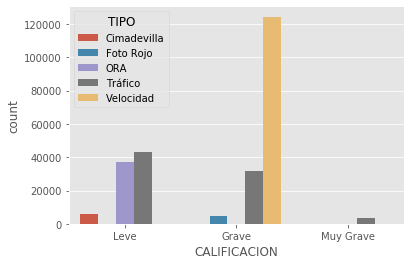

In [25]:
sns.countplot(x='CALIFICACION', hue='TIPO', data=multas);

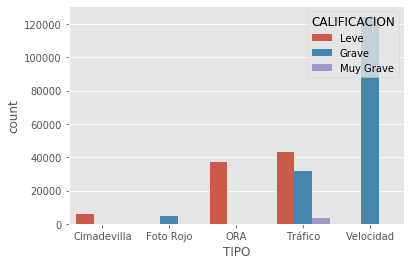

In [26]:
sns.countplot(x='TIPO', hue='CALIFICACION', data=multas);

Quizás una tabla  es más fácil de leer.

In [27]:
pd.crosstab(multas['TIPO'], multas['CALIFICACION'], margins=True)

CALIFICACION,Grave,Leve,Muy Grave,All
TIPO,,,,
Cimadevilla,0,6034,0,6034
Foto Rojo,4637,0,0,4637
ORA,0,36888,0,36888
Tráfico,31920,42974,3250,78144
Velocidad,124422,0,46,124468
All,160979,85896,3296,250171


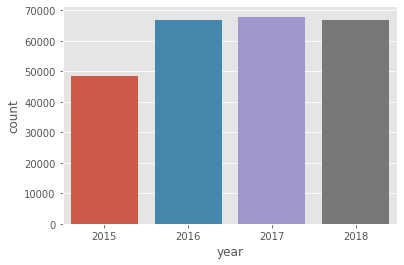

In [28]:
sns.countplot(x='year', data=multas);

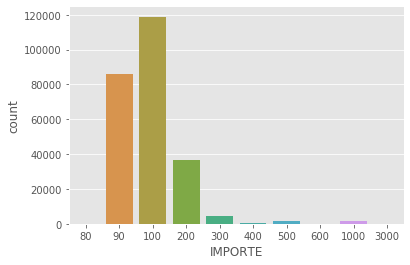

In [29]:
sns.countplot(x='IMPORTE', data=multas)

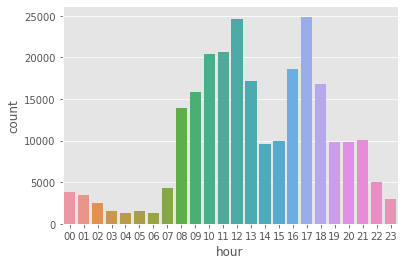

In [30]:
sns.countplot(x='hour',data=multas)

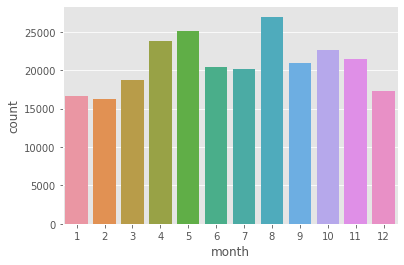

In [31]:
sns.countplot(x='month',data=multas)

¿Y según el día de la semana? ¿Habrá también diferencias según el día de la semana?

In [32]:
multas['IMPORTE'].max()

3000

In [33]:
multas['IMPORTE'].min()

80

In [34]:
multas.IMPORTE.astype('object').count()

250171

In [35]:
multas.describe()

,NUMERO,year,month,IMPORTE,DESCUENTO,PUNTOS,LATITUD,LONGITUD
count,155614.000000,250171.000000,250171.000000,250171.000000,250171.000000,250171.000000,137880.000000,137880.000000
mean,86.590262,2016.612621,6.644979,125.005336,41.946169,0.273953,43.532872,-5.669181
std,470.248476,1.077357,3.281613,96.068682,39.687286,1.007895,0.007841,0.014772
min,1.000000,2015.000000,1.000000,80.000000,0.000000,0.000000,43.485325,-5.716753
25%,9.000000,2016.000000,4.000000,90.000000,0.000000,0.000000,43.524586,-5.682149
50%,15.000000,2017.000000,7.000000,100.000000,45.000000,0.000000,43.536599,-5.667200
75%,41.000000,2018.000000,9.000000,100.000000,50.000000,0.000000,43.539138,-5.655689
max,9450.000000,2018.000000,12.000000,3000.000000,500.000000,6.000000,43.554418,-5.594062


In [36]:
tabla_calificacion = multas.groupby('CALIFICACION').count()[['TIPO']]
tabla_calificacion

,TIPO
CALIFICACION,
Grave,160979
Leve,85896
Muy Grave,3296


In [37]:
tabla_importes = multas.groupby('IMPORTE').count()[['TIPO']]
tabla_importes

,TIPO
IMPORTE,
80,3
90,85893
100,118899
200,36558
300,4665
400,715
500,1589
600,46
1000,1788


In [38]:
tabla_importes = pd.DataFrame(tabla_importes)
tabla_importes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 80 to 3000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TIPO    10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

multas graves

In [39]:
multas_graves = multas[(multas.CALIFICACION == "Muy Grave")].dropna(subset=['LONGITUD', 'LATITUD'])

In [40]:
multas_graves.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 10789 to 64402
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TIPO              731 non-null    object        
 1   CALIFICACION      731 non-null    object        
 2   LUGAR             731 non-null    object        
 3   NUMERO            731 non-null    float64       
 4   year              731 non-null    int64         
 5   month             731 non-null    int64         
 6   IMPORTE           731 non-null    int64         
 7   DESCUENTO         731 non-null    int64         
 8   PUNTOS            731 non-null    int64         
 9   INFRACCION        731 non-null    object        
 10  VELOCIDAD         32 non-null     object        
 11  VELOCIDAD_LIMITE  32 non-null     object        
 12  LATITUD           731 non-null    float64       
 13  LONGITUD          731 non-null    float64       
 14  hour              73

In [41]:
BBox = (multas_graves.LONGITUD.min(),   multas_graves.LONGITUD.max(), 
        multas_graves.LATITUD.min(), multas_graves.LATITUD.max())

In [42]:
BBox

(-5.716528844, -5.595890716, 43.486529543, 43.55387286)

In [43]:
gijon_map = plt.imread('imgs/gijon_map.jpg')

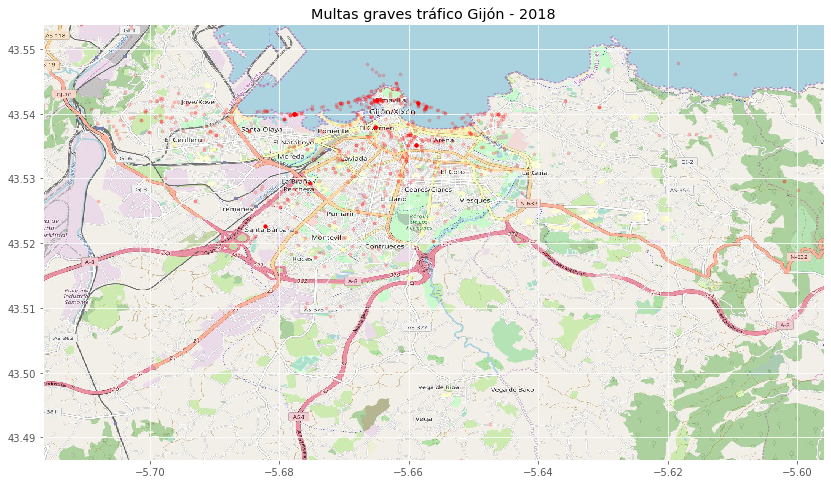

In [44]:
fig, ax = plt.subplots(figsize = (14,10))

ax.scatter(multas_graves.LONGITUD, multas_graves.LATITUD, zorder=1, alpha= 0.2, c='r', s=10)

ax.set_title('Multas graves tráfico Gijón - 2018')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(gijon_map, zorder=0, extent = BBox, aspect= 'equal')

folium

In [45]:
from folium.plugins import FastMarkerCluster
from folium.plugins import FastMarkerCluster

In [46]:
gijon_map = folium.Map(location=[43.5307, -5.66],
    zoom_start=12.5)


In [47]:
gijon_map

In [48]:
# add all the point from the file to the map object using FastMarkerCluster
gijon_map.add_child(FastMarkerCluster(multas_graves[['LATITUD', 'LONGITUD']].values.tolist()))

In [49]:
https://seaborn.pydata.org/generated/seaborn.barplot.html
https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
https://www.kaggle.com/atherx/an-lise-explorat-ria-dos-dados-scdsii

SyntaxError: invalid syntax (<ipython-input-49-119b2b94baf6>, line 1)

### Exploración de datos en Power BI

Python tiene una potencia y una versatilidad fantástica a la hora de construir visualizaciones de datos, pero muchas veces, en nuestro trabajo como analista de datos nos tocará utilizar otras herramientas. 

Una familia muy importante de estas herramientas es la constituida por productos como Tableau, PowerBI, Google Data Studio, etc. En muchas ocasiones simplemente nos veremos obligados a utilizarlas, porque por ejemplo sea la herramienta que utilice nuestro cliente. Pero en otras también pueden ser herramientas muy útiles para nuestra trabajo, ya que nos pueden ayudar a explorar datos de forma visual muy rápidamente, hacer prototipos de lo que podría ser un dashboard para un cliente final, etc.

Además, tanto Tableau como PowerBI tienen versiones gratuitas con las que podremos trabajar (con la limitación de que si queremos publicar nuestro trabajo tenemos que hacerlo público). Y Google Data Studio, aunque mucho menos potente, de momento podemos utilizarla sin ninguna limitación. 

Como parece que el mundo de la visualización ahora mismo parece estar inclinándose hacia el entorno de Power BI, vamos a hacer un ejemplo con esta plataforma.

![](imgs/Tableau_vs_Power_BI_Espana_Google_Trends.jpg)

#### Exportación tabla

In [50]:
multas.to_csv('data/final_datasets/multas_dataset_power_bi.csv', index = False)